In [3]:
from sklearn.datasets import make_classification

# Dummy data
clasData = make_classification(n_features = 5, n_samples = 50,random_state = 42)
print(clasData)
X=clasData[0]
y=clasData[1]

print(X)
print(y)

(array([[-1.16921533,  1.14486264, -0.97468167,  1.58307723, -0.69470526],
       [-0.84888286,  1.10091916, -0.82068232,  1.21524433, -0.53209848],
       [-0.48847035,  0.78204653, -1.1913035 ,  0.7355718 , -0.3214526 ],
       [-0.79960192, -0.33941174, -0.91942423,  0.80846457, -0.35973157],
       [ 0.54044388, -0.78331588, -0.03471177, -0.79382063,  0.34723296],
       [ 0.24881193, -1.07161518,  1.40279431, -0.53914228,  0.23294034],
       [ 1.43008446,  0.95897538,  0.25988279, -1.35996395,  0.60720389],
       [ 0.07012303,  0.58263943,  0.65655361,  0.06415523, -0.02528017],
       [ 1.50381595, -1.84430824, -1.16867804, -2.12694133,  0.93173008],
       [-0.49308676,  0.84753652,  0.29307247,  0.75671589, -0.33046234],
       [-2.10922529,  1.85478373,  0.2322537 ,  2.80439509, -1.23158752],
       [-0.26098803, -0.31725458,  0.06856297,  0.21344413, -0.09619309],
       [ 2.1625167 ,  2.45690167,  0.25049285, -1.81054868,  0.8147069 ],
       [ 4.02272665,  2.47468454,  0.

In [5]:
import numpy as np

# Initialization
learning_rate = 0.1
n_iter = 600
b = 0
w = np.zeros(X.shape[1])  #an array of weights for each X variables
print(w)

[0. 0. 0. 0. 0.]


In [7]:
# Implement Logistic Regression functions with lambda
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sigmoid: -(y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid)).mean()
dldw = lambda x, y, sigmoid: (np.reshape(sigmoid-y,(50,1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda a, g, lr: a-(g*lr)

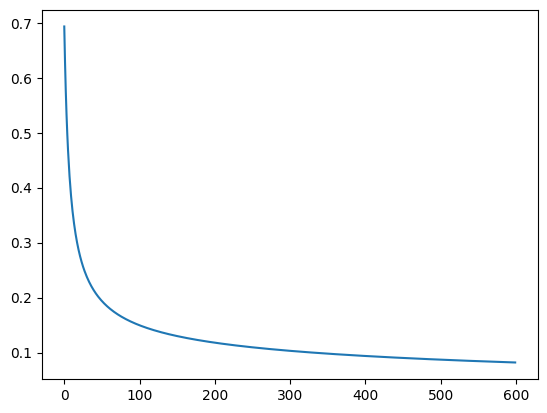

In [8]:
# Do Iteration 
losses = []
for i in range(n_iter):
    yhat = predict(X,w,b)
    sig = sigmoid(yhat)
    logloss = loss(y,sig)
    losses.append(logloss)
    grad_w = dldw(X,y,sig)
    grad_b = dldb(y,sig)
    w = update(w,grad_w,learning_rate)
    b = update(b,grad_b,learning_rate)

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Make Classification Report
yhat = predict(X,w,b)
sigy = sigmoid(yhat)
ypred = sigy >= 0.5
print(classification_report(y,ypred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.85      0.88      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

